In [2]:
from google.colab import files
files.upload()

Saving DeepDream.py to DeepDream.py


{'DeepDream.py': b'\'\'\' \nThis module contain DeepDream class, and DefaultDream class.\n\nto instantiate a DeepDream object an 4 arguments should be given,\narguments:\nimg_path: the path to your image\nmodel: a keras model containing convolutional layers.\npreprocessing_function: (optional, default None) your model may expect data of some sort, in such case\nthis function should be provided to process the input image before feeding it to the model.\ndeprocessing_function: (optional, default None) needed only and only if processing_function is not None\nit\'s simply a function that should undo and implement the reverse preprocessing.\n\nafter that you may need to call get_conv_layers property ot plot_model property to envisage wich layers\nto consider, then you have to make a dictionary with keys as names of these layers, and values as floats\nserving as coefficient designating the contribution of the corresponding layer, afterwards you have to \ncall the set_layers_settings method o

In [3]:
from DeepDream import DeepDream
import numpy as np

87924736/87910968 [==============================] - 0s 0us/step


In [103]:
from tensorflow import keras

img_url = "https://images.unsplash.com/photo-1545792583-533185490f52?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1200&q=80"
img_path = keras.utils.get_file("fantasy__img", origin=img_url)

466944/456345 [==============================] - 0s 0us/step


In [104]:
model = keras.applications.resnet_v2.ResNet50V2(include_top=False)

preprocessing_function = keras.applications.resnet_v2.preprocess_input

def deprocessing_function(img):
  img = img.reshape((img.shape[1], img.shape[2], 3))
  img /= 2.0
  img += 0.5
  img *= 255.
  img = np.clip(img, 0, 255).astype("uint8")
  return img


deepdream = DeepDream(img_path=img_path, model=model, 
                      preprocessing_function=preprocessing_function,
                      deprocessing_function=deprocessing_function)

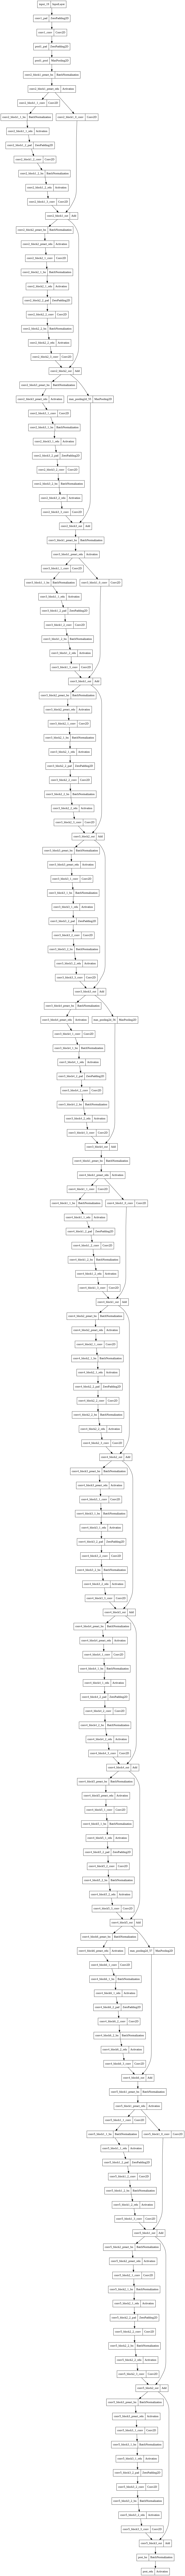

In [105]:
deepdream.plot_model

In [106]:
layers_settings = {
#"conv2_block3_out": 2.0,
"conv3_block4_out": 1.0,
"conv4_block5_out": 2.0,
#"conv5_block3_out": 1.0,
}


deepdream.set_layers_settings(layers_settings)

In [107]:
learning_rate = 30.
num_octaves = 4
octave_scale = 1.4
iterations_per_octave = 50
max_gain = None


deepdream.train(iterations_per_octave=iterations_per_octave, learning_rate=learning_rate,
                num_octaves=num_octaves, octave_scale=octave_scale, max_gain=max_gain)

Processing octave 1... with shape (612, 437)
	iteration n°1: gain is 5.33
	iteration n°2: gain is 5.95
	iteration n°3: gain is 7.14
	iteration n°4: gain is 8.58
	iteration n°5: gain is 10.02
	iteration n°6: gain is 11.45
	iteration n°7: gain is 12.85
	iteration n°8: gain is 14.24
	iteration n°9: gain is 15.59
	iteration n°10: gain is 16.90
	iteration n°11: gain is 18.27
	iteration n°12: gain is 19.61
	iteration n°13: gain is 20.94
	iteration n°14: gain is 22.25
	iteration n°15: gain is 23.56
	iteration n°16: gain is 24.91
	iteration n°17: gain is 26.23
	iteration n°18: gain is 27.54
	iteration n°19: gain is 28.90
	iteration n°20: gain is 30.24
	iteration n°21: gain is 31.67
	iteration n°22: gain is 33.04
	iteration n°23: gain is 34.44
	iteration n°24: gain is 35.87
	iteration n°25: gain is 37.30
	iteration n°26: gain is 38.81
	iteration n°27: gain is 40.30
	iteration n°28: gain is 41.87
	iteration n°29: gain is 43.44
	iteration n°30: gain is 45.09
	iteration n°31: gain is 46.74
	iterat

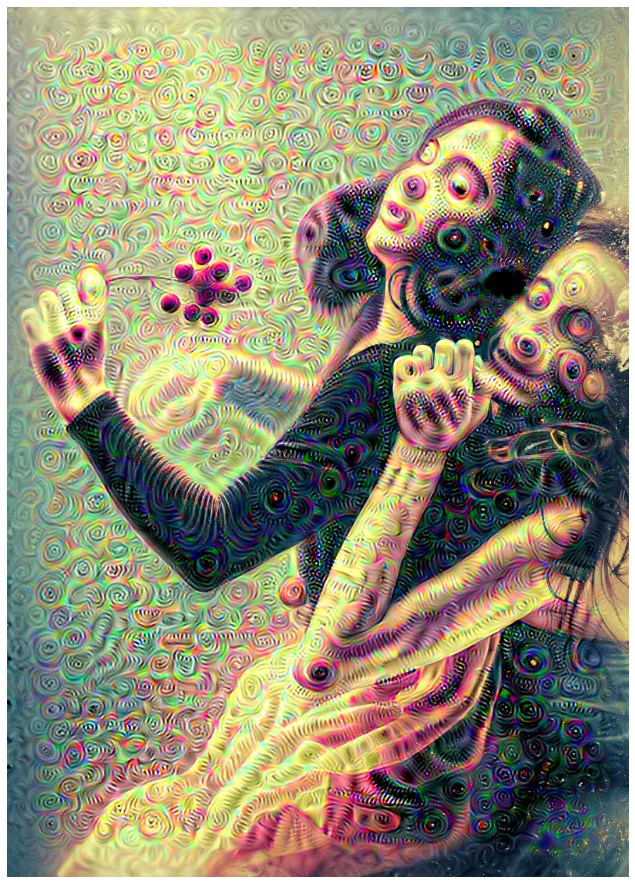

In [108]:
deepdream.plot_final_image

In [109]:
deepdream.dream(output_file="output.mp4")